In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pickle

In [8]:
df = pd.read_excel('cleaned_data.xlsx')
df = df.drop(columns = ['Unnamed: 0'])

In [9]:
# #Checking for missing values  
# (df.isnull().sum()/1065)*100

As we can see there missing values are more than 50 percent in average_maturity and  yield_to_maturity lets drop these columns                           

In [10]:
# #The columns one, 3, 5 year returns are missing becuase the underlying fund might not be there 1,3,5 years ago. So let's go ahead and remove those rows
# df.drop(axis =0 , index = df.loc[df['three_year_returns'].isnull()].index).isnull().sum()/696*100
# #As we can see when we eliminate the rows which have 3 year returns as nan, the 1 year and 5 year returns missing values have been decreased because they are linked to each other 
# #If we remove 5 year returns all the missing values will be removed, however, in order for us to preserve data we need to eliminate 3 year return data 

In [11]:
# df = df.drop(axis = 0, index = df.loc[df['three_year_returns'].isnull()].index)

In [12]:
# #Let's remove columns which have more than 30% of data missing. 
# df = df.drop(columns = ['average_maturity','yield_to_maturity','pe','pb','Exit_Load_lst','link_of_the_funds','name_of_the_fund','name_of_the_fund_lst'])

In [13]:
# #AUM column has values in the format of ₹1,711.78Cr 
# #We need to split it now. 
# # df['aum_funds_individual_lst'] = df['aum_funds_individual_lst'].apply(map(lambda x:x.split('Cr')[0].split('₹')[1].replace(',','')))
# lst = []
# lst_1 = []
# for x in range(0,len(df['aum_funds_individual_lst'])):
#     try:
#         lst.append(float(df['aum_funds_individual_lst'][x].replace('₹','').replace('Cr','').replace(',','')) )
#     except ValueError:
#         lst.append(np.nan)
        
# for y in range(0,len(df['nav_funds_individual_lst'])):  
#     if df['nav_funds_individual_lst'][y].isnumeric() == False:
#         lst_1.append(df['nav_funds_individual_lst'][y].replace(',',''))
#     else :
#         lst_1.append(df['nav_funds_individual_lst'][y])
    

In [14]:
# df['aum_funds_individual_lst'] = lst
# df['nav_funds_individual_lst'] = lst_1

In [15]:
df.describe()

,aum_funds_individual_lst,nav_funds_individual_lst,minimum_funds_individual_lst,debt_per,equity_per,one_year_returns,three_year_returns,five_year_returns
count,1064.000000,1065.000000,1064.000000,1065.000000,1065.000000,966.000000,817.000000,696.000000
mean,3017.811814,294.911192,1128.393045,44.328628,53.938497,3.640921,11.488237,8.813463
std,6150.232379,743.506776,3377.428629,44.728471,44.898943,7.740558,7.212429,3.851759
min,0.190000,6.100000,1.260000,-1.895950,-0.020871,-38.870000,-14.350000,-3.120000
25%,142.150000,14.930000,128.392500,2.590000,0.000000,1.932500,5.640000,6.167500
50%,641.515000,29.750000,500.000000,18.018671,73.559683,3.560000,10.200000,7.740000
75%,2644.652500,94.230000,500.000000,100.000000,97.170000,4.897500,15.610000,11.432500
max,60186.790000,5273.310000,50128.840000,100.020871,101.895950,78.290000,42.730000,27.400000


In [16]:
df = df.fillna({'rating_of_funds_individual_lst':df['rating_of_funds_individual_lst'].mode()[0],
                                    'minimum_funds_individual_lst':df['minimum_funds_individual_lst'].mean(),
                                    'five_year_returns':df['five_year_returns'].mean(),
                                    'aum_funds_individual_lst':df['aum_funds_individual_lst'].mean()
                                   })
df = df.drop(columns = ['minimum_funds_individual_lst'])

c:\Users\R M Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


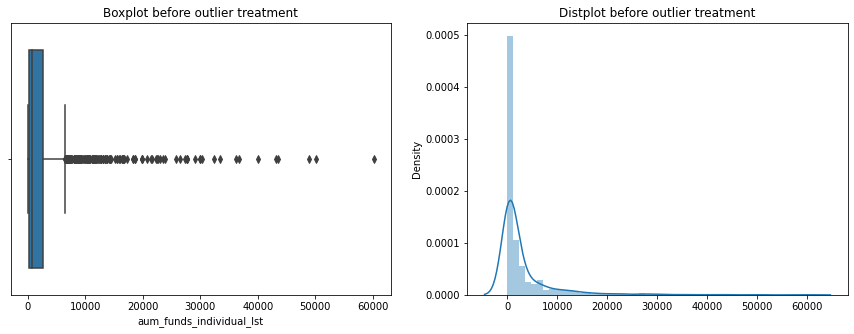

In [17]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['aum_funds_individual_lst']).set(title='Boxplot before outlier treatment')
sns.distplot(ax = axes[1],x =df['aum_funds_individual_lst']).set(title='Distplot before outlier treatment')

# plt.savefig('report.png')
plt.show()

c:\Users\R M Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


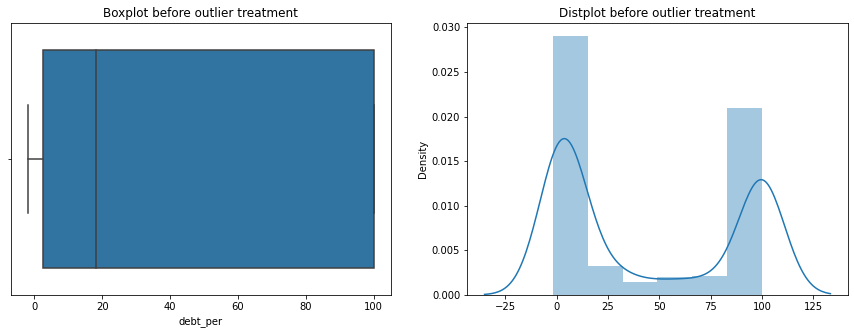

In [18]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['debt_per']).set(title='Boxplot before outlier treatment')
sns.distplot(ax = axes[1],x =df['debt_per']).set(title='Distplot before outlier treatment')

# plt.savefig('report.png')
plt.show()

c:\Users\R M Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


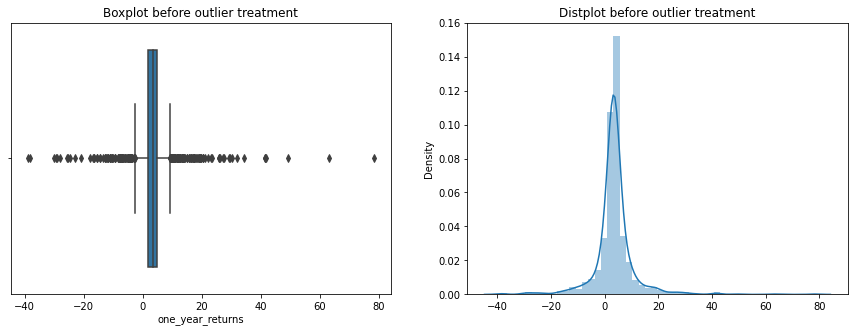

In [19]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['one_year_returns']).set(title='Boxplot before outlier treatment')
sns.distplot(ax = axes[1],x =df['one_year_returns']).set(title='Distplot before outlier treatment')

# plt.savefig('report.png')
plt.show()

c:\Users\R M Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


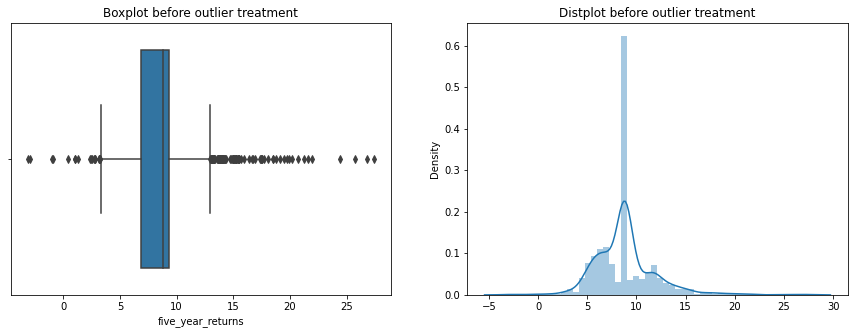

In [20]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['five_year_returns']).set(title='Boxplot before outlier treatment')
sns.distplot(ax = axes[1],x =df['five_year_returns']).set(title='Distplot before outlier treatment')

# plt.savefig('report.png')
plt.show()

c:\Users\R M Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


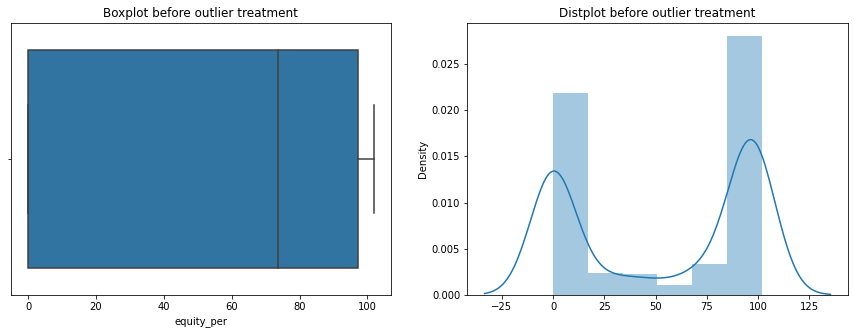

In [21]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['equity_per']).set(title='Boxplot before outlier treatment')
sns.distplot(ax = axes[1],x =df['equity_per']).set(title='Distplot before outlier treatment')

# plt.savefig('report.png')
plt.show()

c:\Users\R M Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


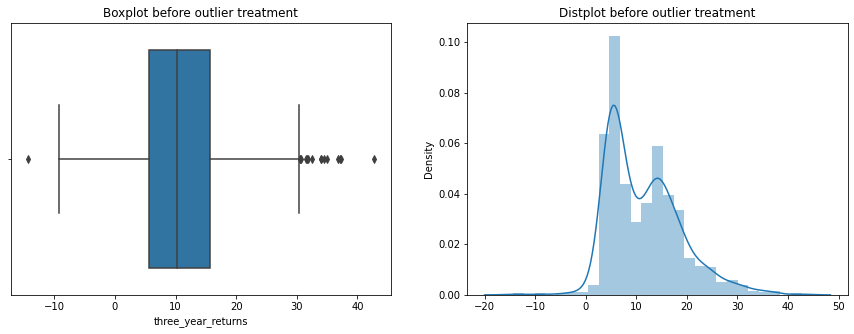

In [22]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['three_year_returns']).set(title='Boxplot before outlier treatment')
sns.distplot(ax = axes[1],x =df['three_year_returns']).set(title='Distplot before outlier treatment')

# plt.savefig('report.png')
plt.show()

In [39]:
df['aum_funds_individual_lst'] = np.where(df["aum_funds_individual_lst"] >df["aum_funds_individual_lst"].quantile(0.95), df["aum_funds_individual_lst"].mean(),df["aum_funds_individual_lst"])
df['debt_per'] = np.where(df["debt_per"] >df["debt_per"].quantile(0.75), df["debt_per"].mean(),df["debt_per"])
df['one_year_returns'] = np.where(df["one_year_returns"] >df["one_year_returns"].quantile(0.95), df["one_year_returns"].mean(),df["one_year_returns"])
df['equity_per'] = np.where(df["equity_per"] >df["equity_per"].quantile(0.75), df["equity_per"].mean(),df["equity_per"])
df['three_year_returns'] = np.where(df["three_year_returns"] >df["three_year_returns"].quantile(0.95), df["three_year_returns"].mean(),df["three_year_returns"])
df['five_year_returns'] = np.where(df["five_year_returns"] >df["five_year_returns"].quantile(0.95), df["five_year_returns"].mean(),df["five_year_returns"])

df['aum_funds_individual_lst'] = df['aum_funds_individual_lst']  / df['aum_funds_individual_lst'].abs().max()
df['debt_per'] = df['debt_per']  / df['debt_per'].abs().max()
df['one_year_returns'] = df['one_year_returns']  / df['one_year_returns'].abs().max()
df['equity_per'] = df['equity_per']  / df['equity_per'].abs().max()
df['three_year_returns'] = df['three_year_returns']  / df['three_year_returns'].abs().max()
df['five_year_returns'] = df['five_year_returns']  / df['five_year_returns'].abs().max()

with open('lst_transform.pkl', 'wb') as f:
        pickle.dump([df['aum_funds_individual_lst'].abs().max(),df['debt_per'].abs().max(), df['one_year_returns'].abs().max(), df['equity_per'].abs().max(),df['three_year_returns'].abs().max(),df['five_year_returns'].abs().max()], f)




c:\Users\R M Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


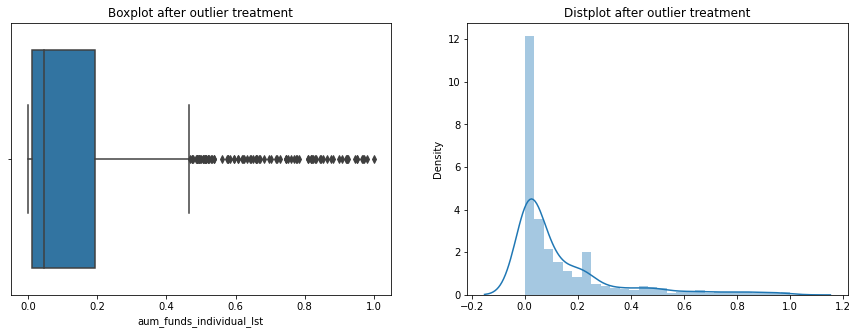

In [24]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['aum_funds_individual_lst']).set(title='Boxplot after outlier treatment')
sns.distplot(ax = axes[1],x =df['aum_funds_individual_lst']).set(title='Distplot after outlier treatment')

# plt.savefig('report.png')
plt.show()

c:\Users\R M Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


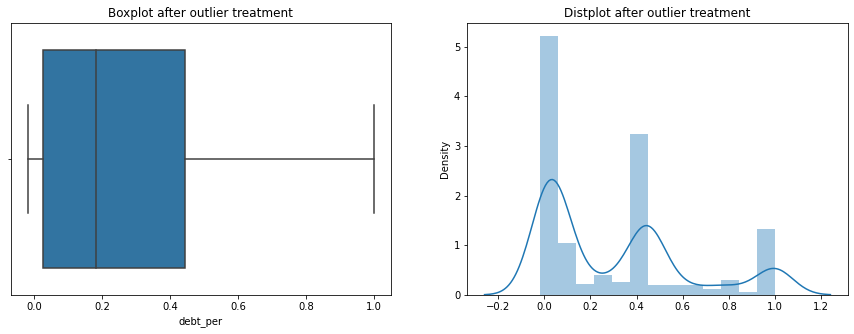

In [25]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['debt_per']).set(title='Boxplot after outlier treatment')
sns.distplot(ax = axes[1],x =df['debt_per']).set(title='Distplot after outlier treatment')

# plt.savefig('report.png')
plt.show()

c:\Users\R M Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


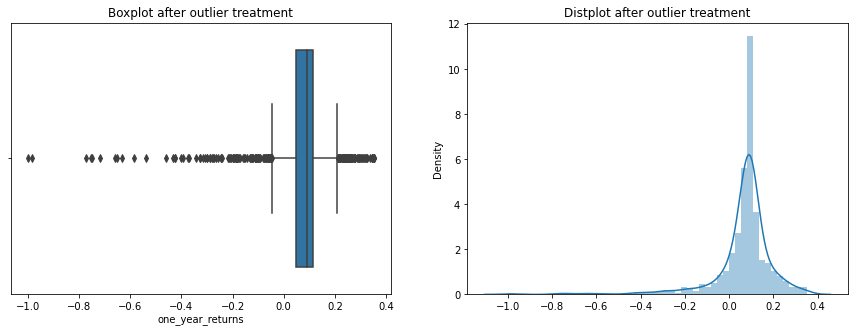

In [26]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['one_year_returns']).set(title='Boxplot after outlier treatment')
sns.distplot(ax = axes[1],x =df['one_year_returns']).set(title='Distplot after outlier treatment')

# plt.savefig('report.png')
plt.show()

c:\Users\R M Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


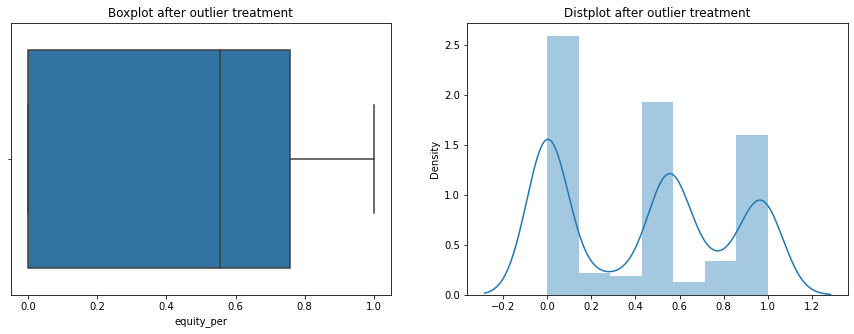

In [27]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['equity_per']).set(title='Boxplot after outlier treatment')
sns.distplot(ax = axes[1],x =df['equity_per']).set(title='Distplot after outlier treatment')

# plt.savefig('report.png')
plt.show()

c:\Users\R M Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


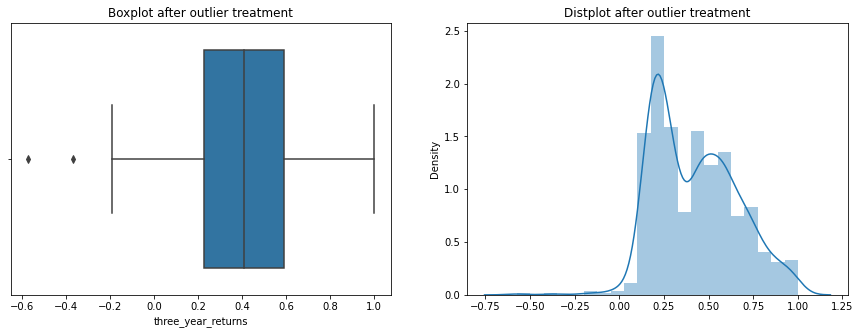

In [28]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['three_year_returns']).set(title='Boxplot after outlier treatment')
sns.distplot(ax = axes[1],x =df['three_year_returns']).set(title='Distplot after outlier treatment')

# plt.savefig('report.png')
plt.show()

c:\Users\R M Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


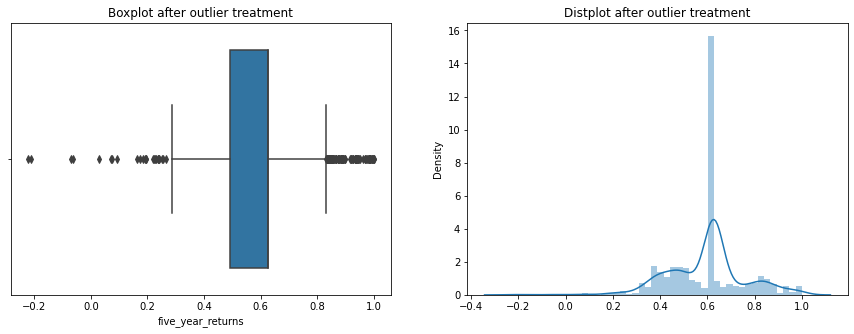

In [29]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['five_year_returns']).set(title='Boxplot after outlier treatment')
sns.distplot(ax = axes[1],x =df['five_year_returns']).set(title='Distplot after outlier treatment')

# plt.savefig('report.png')
plt.show()

In [30]:
#Here  we are pre processing the data and prepaing the data for analysis 
from sklearn import preprocessing 
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    res_df['rating_of_funds_individual_lst'] = le.fit_transform(res_df['rating_of_funds_individual_lst'])
    res_df['type_of_fund'] = le.fit_transform(res_df['type_of_fund'])
    res_df['risk_of_the_fund'] = le.fit_transform(res_df['risk_of_the_fund'])
    np.save('classes.npy', le.classes_)
    return res_df
    
new_df = preprocessor(df)


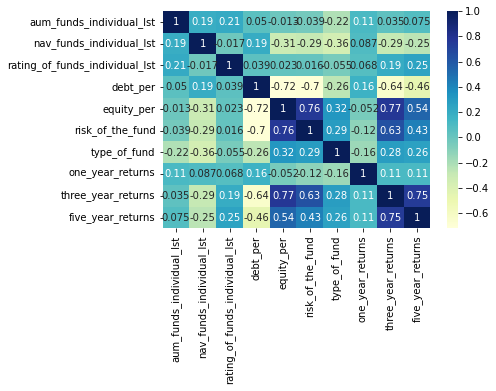

In [31]:
# plotting correlation heatmap
dataplot = sns.heatmap(new_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [32]:
#As we can see we have removed all the null values 
from sklearn.model_selection import train_test_split
import sklearn.metrics 
import math  


In [33]:
x_train, x_test, y_train, y_test = train_test_split(new_df.drop(['three_year_returns'],axis=1),
                                                    new_df['three_year_returns'],test_size=0.30)

In [34]:
from sklearn import linear_model 

reg_model = linear_model.LinearRegression() # making regression model
reg_model.fit(x_train, y_train) #Here we are fitting the data set as an x_train and y_train

prediction = reg_model.predict(x_test) #Here we are predicting the test data

print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

r2_score:  -6.742702621676692e+30
Mean absolute error: 252287473098737.44
Root mean squared error:  618812774117178.8
Adjusted r2_score:  -6.999839586062668e+30


<ipython-input-1408-e556e9da81d5>:17: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


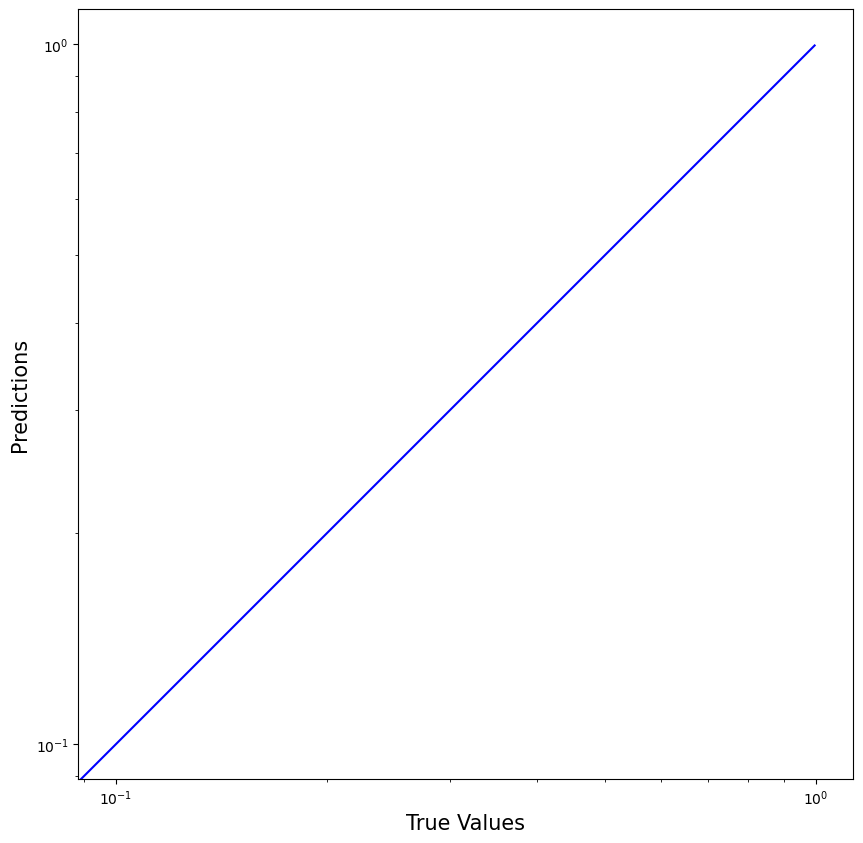

In [ ]:
from sklearn.linear_model import SGDRegressor #SGD regreessor is a build in library which we can import
sgd_regressor_model = SGDRegressor(max_iter=100)  # increasing this value leads to over fitting
sgd_regressor_model.fit(x_train,y_train)

prediction = sgd_regressor_model.predict(x_test)

print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)


plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


r2_score:  0.7884784316576433
Mean absolute error: 0.07
Root mean squared error:  0.10960228189407009
Adjusted r2_score:  0.8185475243903501


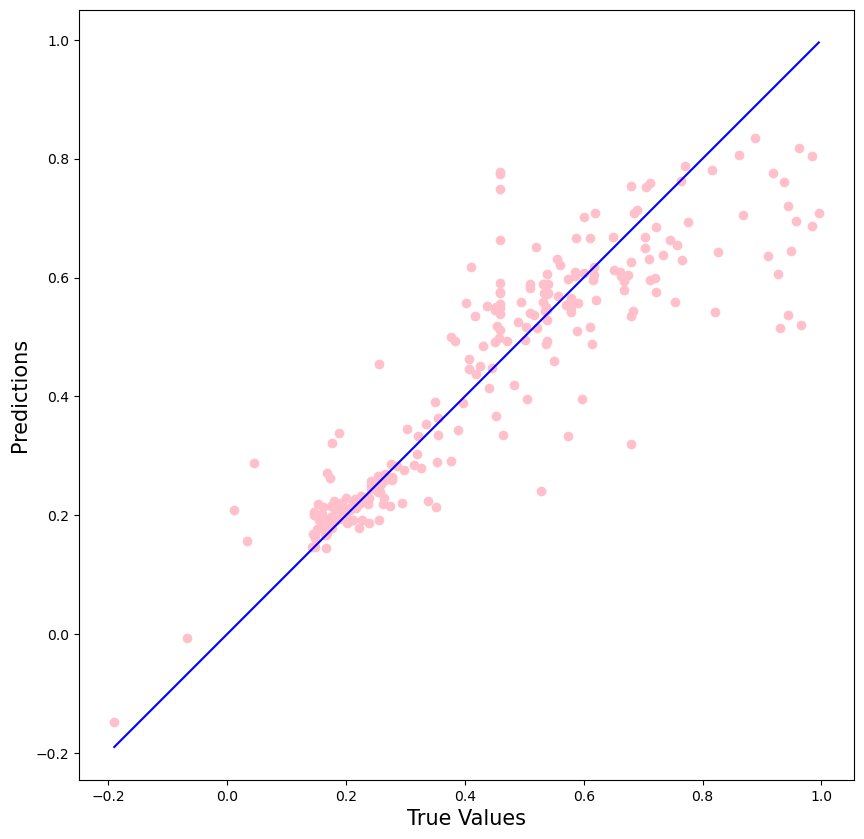

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor_model = RandomForestRegressor()
random_forest_regressor_model.fit(x_train,y_train)

prediction = random_forest_regressor_model.predict(x_test)


print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


r2_score:  0.628805750907107
Mean absolute error: 0.09
Root mean squared error:  0.14519206656114678
Adjusted r2_score:  0.6527856312383102


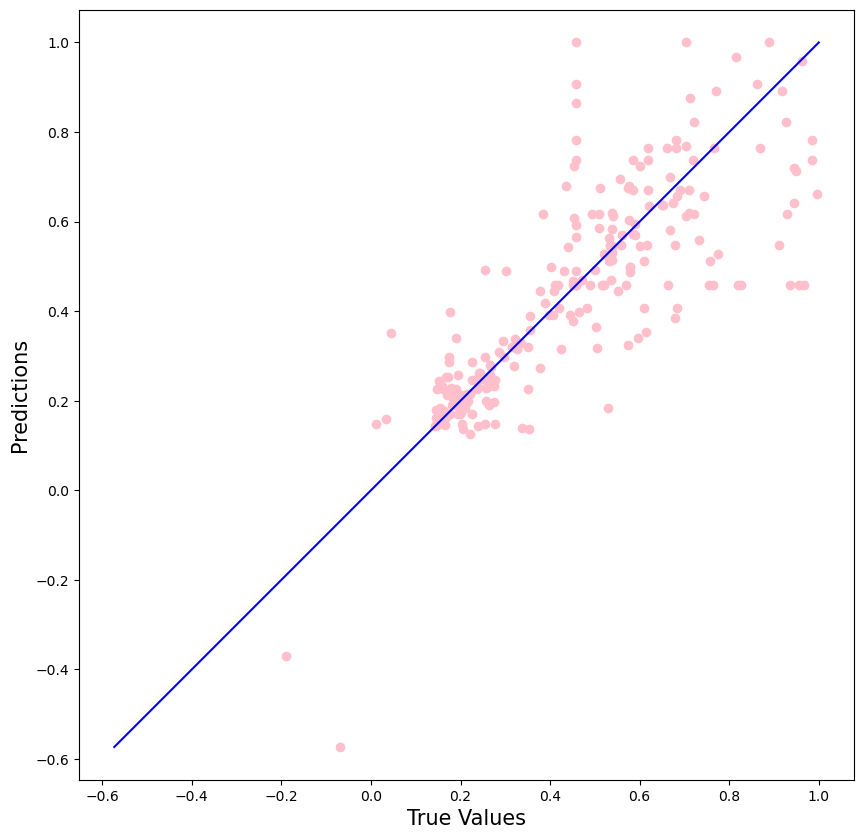

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor_model = DecisionTreeRegressor()
decision_tree_regressor_model.fit(x_train,y_train)

prediction = decision_tree_regressor_model.predict(x_test)


print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


r2_score:  0.7569736573007038
Mean absolute error: 0.08
Root mean squared error:  0.11748135388880618
Adjusted r2_score:  0.7858412967740356


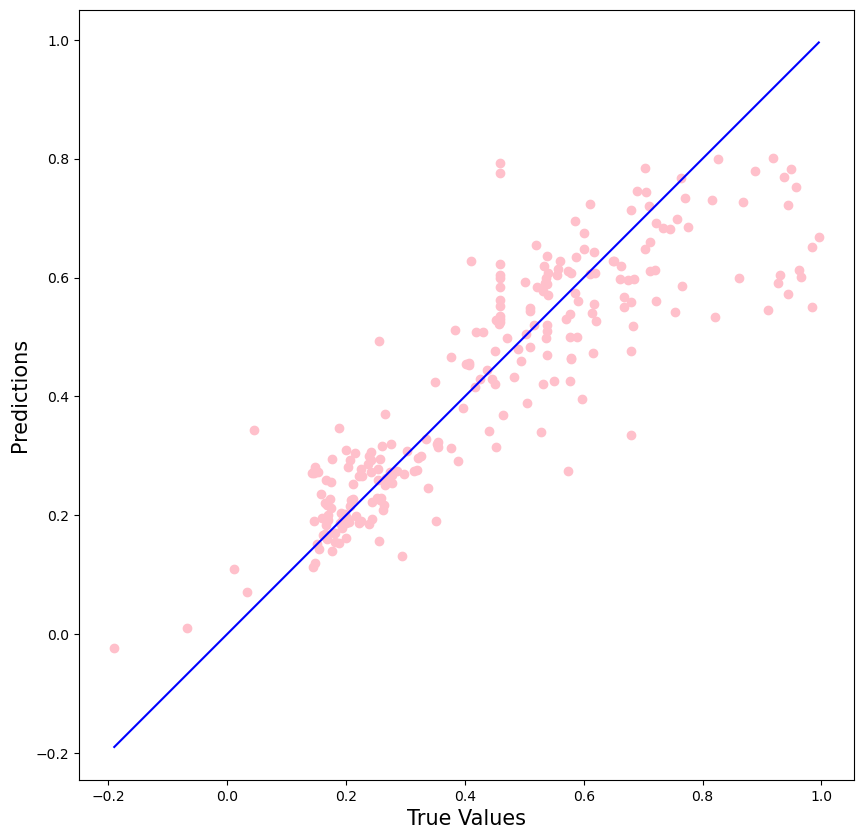

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(x_train, y_train)
Ridge()
prediction = clf.predict(x_test)

print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)


plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


r2_score:  0.6996898426847902
Mean absolute error: 0.10
Root mean squared error:  0.13059521897550463
Adjusted r2_score:  0.7263729299058203


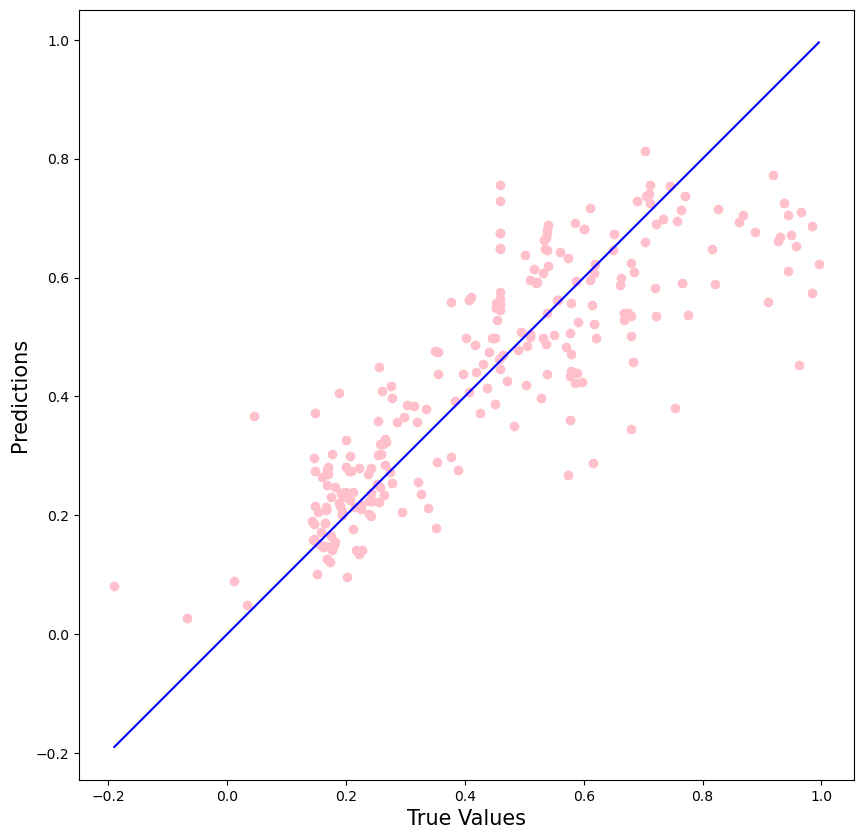

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
regr = MLPRegressor(random_state=40).fit(x_train, y_train)
prediction = regr.predict(x_test)

print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()
r2 = sklearn.metrics.r2_score(y_test,prediction)


r2_score:  0.3596685670250943
Mean absolute error: 0.14
Root mean squared error:  0.1906973587137422
Adjusted r2_score:  0.3733847411913056


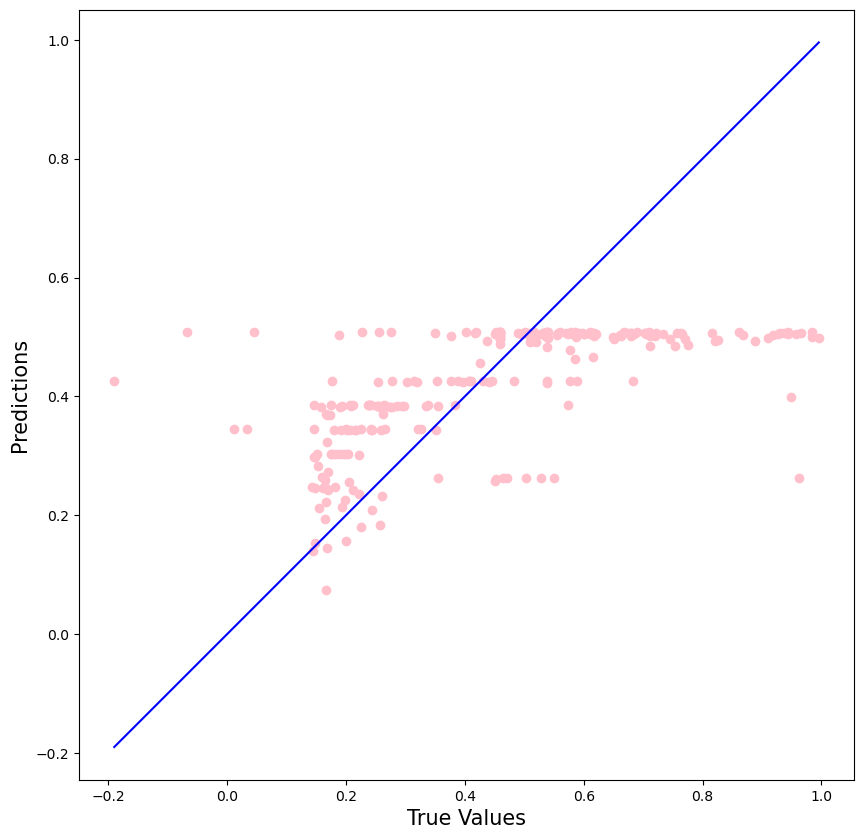

In [ ]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
prediction = lasso.predict(x_test)


print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


In [ ]:
feature_importance = random_forest_regressor_model.feature_importances_
feature_importance

array([0.03088967, 0.05941455, 0.01023873, 0.48605765, 0.13778799,
       0.00668932, 0.01381309, 0.05125672, 0.20385228])

In [ ]:
columns = list(x_train.columns)
columns


['aum_funds_individual_lst',
 'nav_funds_individual_lst',
 'rating_of_funds_individual_lst',
 'debt_per',
 'equity_per',
 'risk_of_the_fund',
 'type_of_fund',
 'one_year_returns',
 'five_year_returns']

In [ ]:
feature_importance_value = []
for i in range(len(feature_importance)):
    feature_importance_value.append(round(feature_importance[i],5))
feature_importance_value

[0.03089,
 0.05941,
 0.01024,
 0.48606,
 0.13779,
 0.00669,
 0.01381,
 0.05126,
 0.20385]

In [ ]:
 # making a dataframe
feature_importance_df = pd.DataFrame({"Features":columns,
                                     "Values":feature_importance_value })
feature_importance_df

,Features,Values
0,aum_funds_individual_lst,0.03089
1,nav_funds_individual_lst,0.05941
2,rating_of_funds_individual_lst,0.01024
3,debt_per,0.48606
4,equity_per,0.13779
5,risk_of_the_fund,0.00669
6,type_of_fund,0.01381
7,one_year_returns,0.05126
8,five_year_returns,0.20385


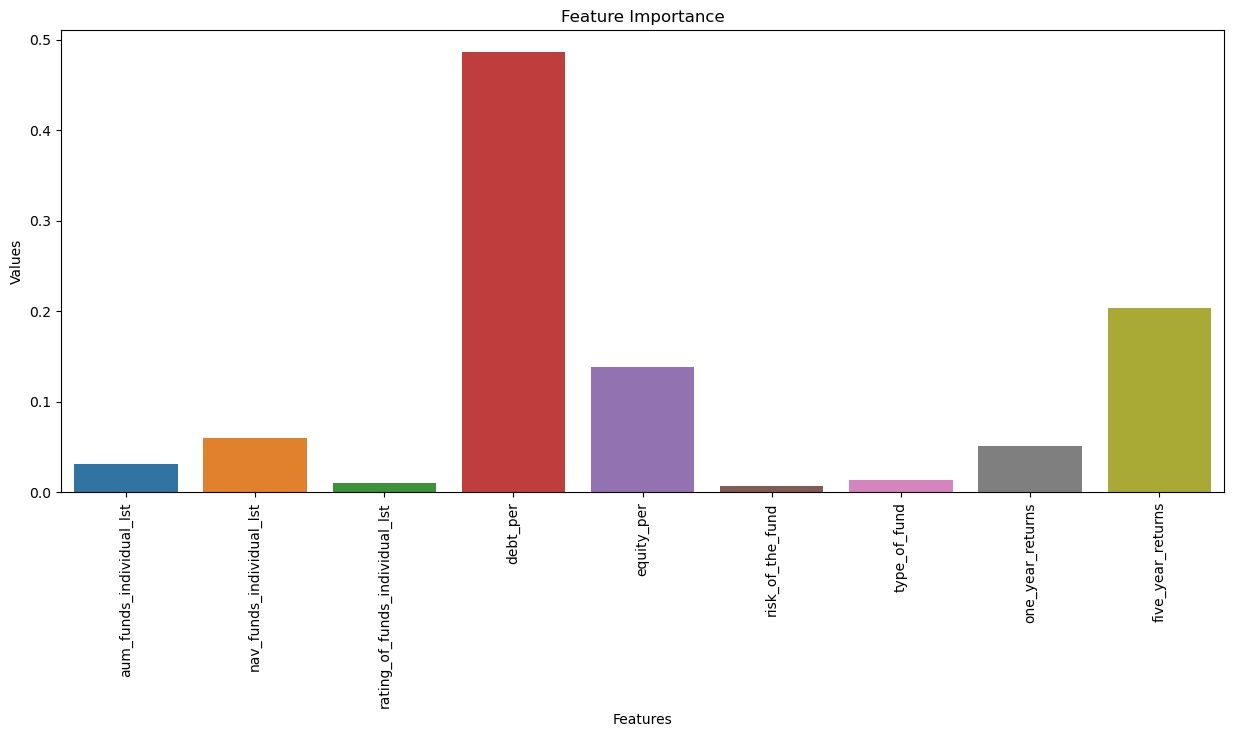

In [ ]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

In [ ]:
n_estimators = [1,2,3,5,20,50,100,1000,6,8,4,200,250,500,460] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 400, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [1,2, 6, 10,12,16,18,20,100,1000,250,500,360] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4,10,20,40,5,1000,100] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 489 out of 500 | elapsed:   16.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 45, 80, 116, 151, 187,
                                                      222, 258, 293, 329, 364,
                                                      400],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4, 10, 20,
                                                             40, 5, 1000, 100],
                                        'min_samples_split': [1, 2, 6, 10, 12,
                                                              16, 18, 20, 100,
                                                              1000, 250, 500,
                                                              360],
                                        'n_estimators': [1, 2, 3, 5, 20, 5

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [1, 2, 3, 5, 20, 50, 100, 1000, 6, 8, 4, 200, 250, 500, 460], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 45, 80, 116, 151, 187, 222, 258, 293, 329, 364, 400], 'min_samples_split': [1, 2, 6, 10, 12, 16, 18, 20, 100, 1000, 250, 500, 360], 'min_samples_leaf': [1, 3, 4, 10, 20, 40, 5, 1000, 100], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 460, 'min_samples_split': 16, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 116, 'bootstrap': False}  



r2_score:  0.789375704436184
Mean absolute error: 0.07
Root mean squared error:  0.1093695688443358
Adjusted r2_score:  0.8194790151985809


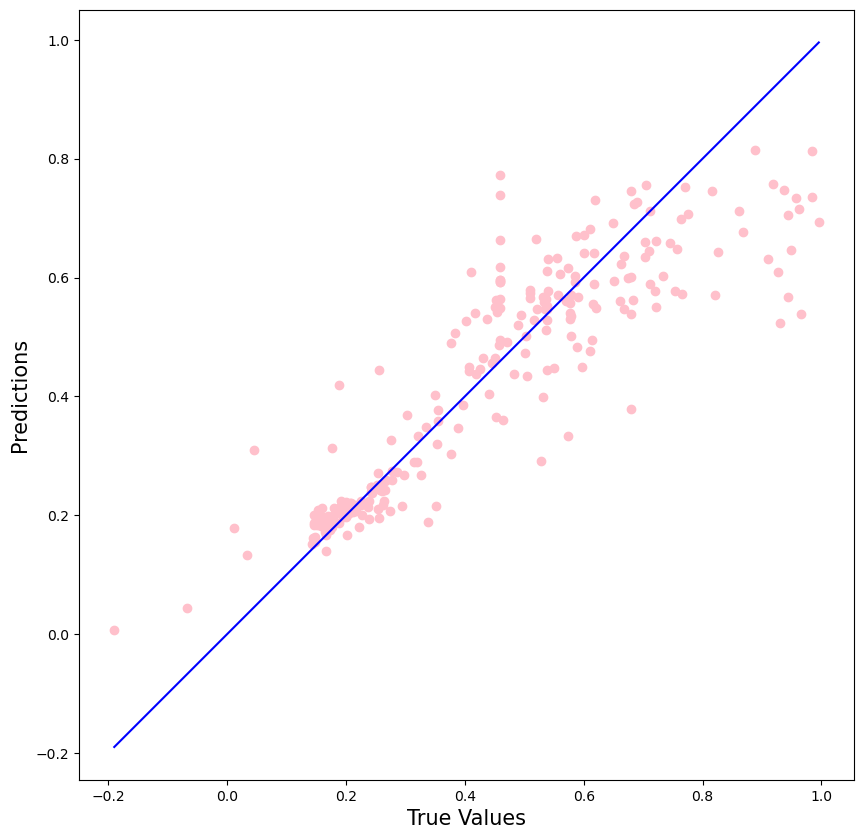

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor_model = RandomForestRegressor(n_estimators = 460, min_samples_split = 16, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 116, bootstrap=False)
random_forest_regressor_model.fit(x_train,y_train)

prediction = random_forest_regressor_model.predict(x_test)


print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


In [ ]:
#Saving the model 
import pickle
pickle.dump(random_forest_regressor_model, open('model_three_year_returns.pkl', 'wb'))

r2_score:  0.789375704436184
Mean absolute error: 0.07
Root mean squared error:  0.1093695688443358
Adjusted r2_score:  0.8194790151985809


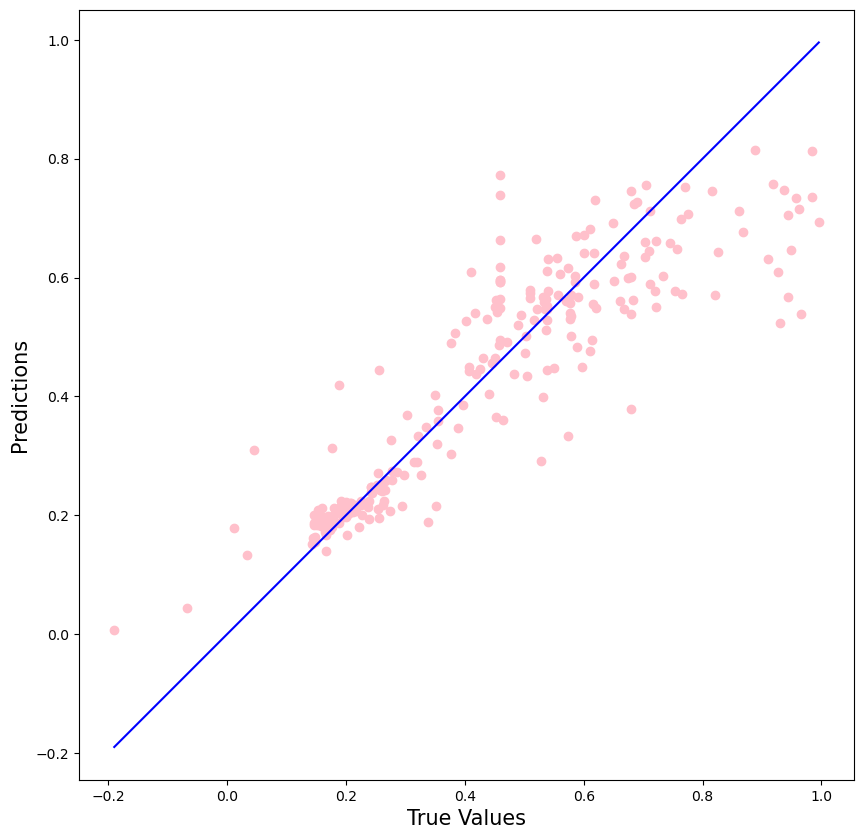

In [ ]:
#Unpickling the model and testing the model
pickled_model = pickle.load(open('model_three_year_returns.pkl', 'rb'))
prediction = pickled_model.predict(x_test)


print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


# Let me know if you have any suggestion 
# Email: - rmsrinivas199627@gmail.com